# Storytelling Data Visualization on Exchange Rates
The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank. It is available here: https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020

Let's start by reading in the dataset.

In [137]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [138]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Our dataset has 5699 rows and 41 columns. The columns are mainly strings, but we have 3 columns that are float type. Most columns have minimal null-values. The 'Greek drachma' column has over 5000 null values and a few others have over half their entires as null.

In [139]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [140]:
#extract Time and US_dollar columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
print(euro_to_dollar['US_dollar'].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.2657     1
1.4447     1
1.3371     1
1.1538     1
1.3896     1
Name: US_dollar, Length: 3528, dtype: int64


In [141]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


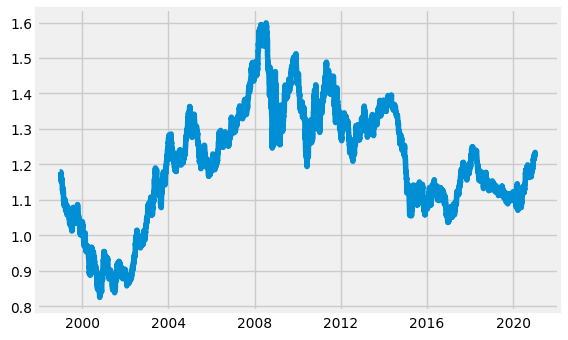

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

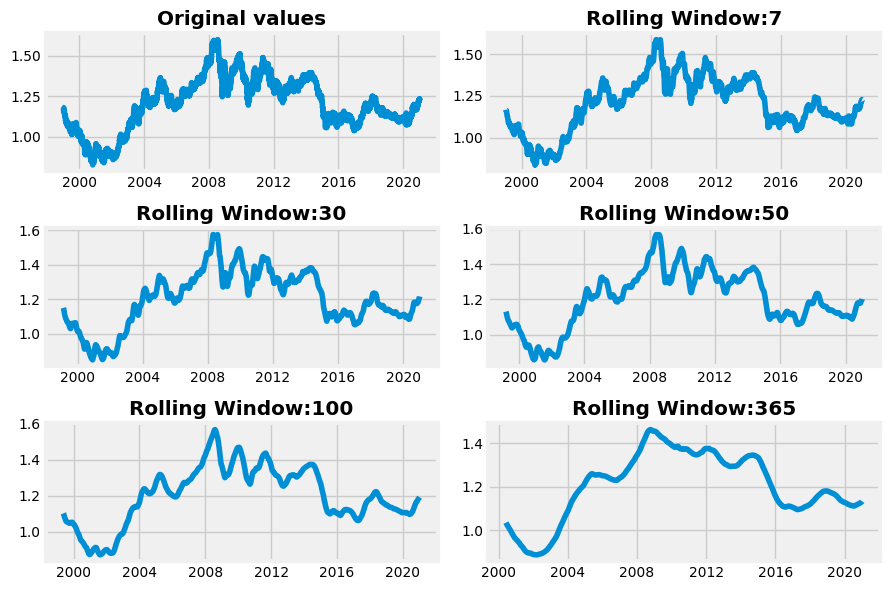

In [143]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [144]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


# Financial Crisis Example
We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot

In [145]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]

financial_crisis['Time'].max()

Timestamp('2009-12-31 00:00:00')

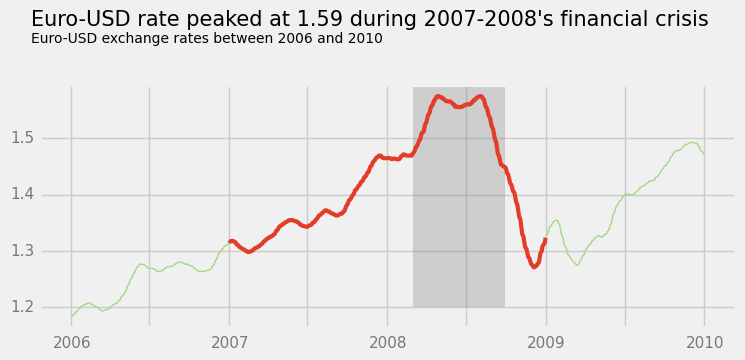

In [146]:
## use fivethirtyeight style
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt
style.use('fivethirtyeight')

## add the plot
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
      financial_crisis['rolling_mean'],
      linewidth=1,
      color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

ax.axvspan(xmin=dt.datetime(2008,3,1), xmax=dt.datetime(2008,9,25), ymin=0.09,
           alpha=0.3, color='grey')

ax.set_xticklabels([])
ax.set_yticklabels([])

x=dt.datetime(2005,11,20)
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x = x + dt.timedelta(days=365)

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1
    
#add title
ax.text(dt.datetime(2005,10,1), 1.7, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", size=15)
ax.text(dt.datetime(2005,10,1), 1.67, 'Euro-USD exchange rates between 2006 and 2010', size=10)

plt.show()

## Euro-USD Rate During Bush, Obama and Trump Presidential Terms.

In [147]:
#data from years 2001-2021
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

#data during bush presidency
bush = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year < 2009)]
#data during obama presidency
obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
#data during trump presidency
trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

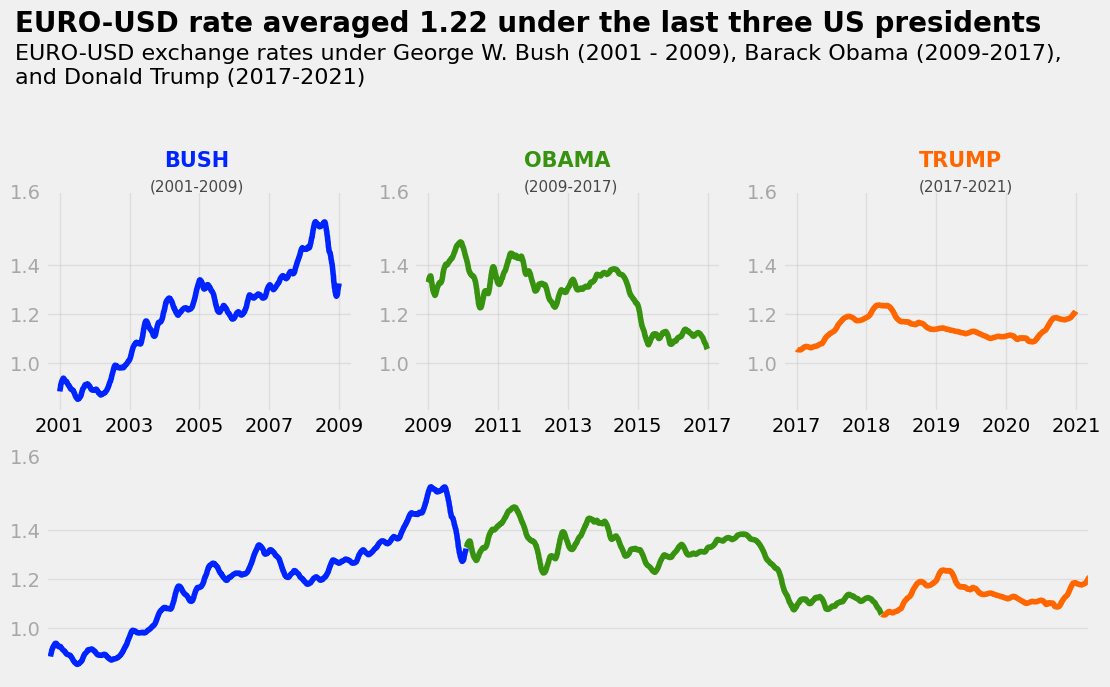

In [149]:
style.use('fivethirtyeight')

##add subplots - 2 rows with 3 charts in top, 1 in bottom

plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.7])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

#bush era
ax1.plot(bush['Time'], bush['rolling_mean'], color='#0024ff')
ax1.set_xticks([dt.datetime(2001,1,1), dt.datetime(2003,1,1), dt.datetime(2005,1,1), dt.datetime(2007,1,1), dt.datetime(2009,1,1)])
ax1.set_xticklabels(['2001','2003','2005','2007','2009'])
ax1.text(dt.datetime(2004,1,1), 1.8, 'BUSH', size=15, color='#0024ff', weight='bold')
ax1.text(dt.datetime(2003,7,28), 1.7, '(2001-2009)', size=11, alpha=0.7)

#obama era
ax2.plot(obama['Time'], obama['rolling_mean'], color='#37920f')
ax2.set_xticks([dt.datetime(2009,1,1), dt.datetime(2011,1,1), dt.datetime(2013,1,1), dt.datetime(2015,1,1), dt.datetime(2017,1,1)])
ax2.set_xticklabels(['2009', '2011', '2013', '2015', '2017'])
ax2.text(dt.datetime(2011,10,1), 1.8, 'OBAMA', color='#37920f', weight='bold', size=15)
ax2.text(dt.datetime(2011,10,1), 1.7, '(2009-2017)', size=11, alpha=0.7)

#trump era
ax3.plot(trump['Time'], trump['rolling_mean'], color='#ff6600')
ax3.set_xticks([dt.datetime(2017,1,1), dt.datetime(2018,1,1), dt.datetime(2019,1,1), dt.datetime(2020,1,1), dt.datetime(2021,1,1)])
ax3.set_xticklabels(['2017', '2018', '2019', '2020', '2021'])
ax3.text(dt.datetime(2018,10,1), 1.8, 'TRUMP', color='#ff6600', weight='bold', size=15)
ax3.text(dt.datetime(2018,10,1), 1.7, '(2017-2021)', size=11, alpha=0.7)

##plot for all 3 eras combined
ax4.plot(bush['Time'], bush['rolling_mean'], color='#0024ff')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#37920f')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#ff6600')
ax4.set_xticks([])
ax4.set_xlim(dt.datetime(2000,12,1), dt.datetime(2020,12,31))

#add title
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

plt.show()